In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

path_eng = 'eng.txt'
text_eng = open(path_eng).read().lower()
train_eng =  text_eng[:int(.8*len(text_eng))]
test_eng =  text_eng[int(.8*len(text_eng)):]


path_frn = 'frn.txt'
text_frn = open(path_frn).read().lower()
train_frn =  text_frn[:int(.8*len(text_frn))]
test_frn =  text_frn[int(.8*len(text_frn)):]


chars = sorted(list(set(text_frn+text_eng)))
chars += ['_']
print('total chars:', len(chars))
print (chars)
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

sentences_eng = []
next_chars_eng = []

sentences_frn = []
next_chars_frn = []

def generate_sub_string_eng(maxlen,text,sentences, next_chars):
    for i in range(0, len(text) - maxlen):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
        
def generate_sub_string_frn(maxlen,text,sentences, next_chars):
    for i in range(0, len(text) - maxlen):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])
        
maxlen = 14

for i in range(1,maxlen):
    generate_sub_string_eng(i,text_eng,sentences_eng, next_chars_eng)
    
print (len(sentences_eng))
sentences_eng = ['_'+x+'_' for x in sentences_eng]


for i in range(1,maxlen):
    generate_sub_string_frn(i,text_frn,sentences_frn, next_chars_frn)
    
print (len(sentences_frn))
sentences_frn = ['_'+x+'_' for x in sentences_frn]

print (sentences_eng[-50:])
print (sentences_frn[-50:])




Using TensorFlow backend.


total chars: 45
['\n', '\x0c', ' ', "'", ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '_']
139607
156026
['_truction of a_', '_ruction of an_', '_uction of any_', '_ction of any _', '_tion of any o_', '_ion of any of_', '_on of any of _', '_n of any of t_', '_ of any of th_', '_of any of the_', '_f any of the _', '_ any of the r_', '_any of the ri_', '_ny of the rig_', '_y of the righ_', '_ of the right_', '_of the rights_', '_f the rights _', '_ the rights a_', '_the rights an_', '_he rights and_', '_e rights and _', '_ rights and f_', '_rights and fr_', '_ights and fre_', '_ghts and free_', '_hts and freed_', '_ts and freedo_', '_s and freedom_', '_ and freedoms_', '_and freedoms _', '_nd freedoms s_', '_d freedoms se_', '_ freedoms set_', '_freedoms set _', '_reedoms set f_', '_eedoms set fo_', '_edoms set for_', '_doms set fort_'

In [39]:
print('Vectorization...')
maxlen = 16
X_eng = np.zeros((len(sentences_eng), maxlen, len(chars)), dtype=np.bool)
y_eng = np.zeros((len(sentences_eng), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_eng):
    for t, char in enumerate(sentence):
        X_eng[i, t, char_indices[char]] = 1
        y_eng[i, char_indices[next_chars_eng[i]]] = 1        
        
        
X_frn = np.zeros((len(sentences_frn), maxlen, len(chars)), dtype=np.bool)
y_frn = np.zeros((len(sentences_frn), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences_frn):
    for t, char in enumerate(sentence):
        X_frn[i, t, char_indices[char]] = 1
        y_frn[i, char_indices[next_chars_frn[i]]] = 1   

Vectorization...


In [3]:
# build the model: a single LSTM
print('Build eng model...')
model_eng = Sequential()
model_eng.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_eng.add(Dense(len(chars)))
model_eng.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model_eng.compile(loss='categorical_crossentropy', optimizer=optimizer)

print('Build frn model...')
model_frn = Sequential()
model_frn.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_frn.add(Dense(len(chars)))
model_frn.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model_frn.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build eng model...
Build frn model...


In [4]:

model_eng.fit(X_eng, y_eng,
          batch_size=128,
          epochs=5)




Epoch 1/5
139607/139607 [==============================] - 30s - loss: 2.1849      

In [5]:
model_frn.fit(X_frn, y_frn,
          batch_size=128,
          epochs=5)

Epoch 1/5
156026/156026 [==============================] - 33s - loss: 2.0962      

In [6]:
test_string_eng = []
test_string_frn = []


for i in range(100):
    start_index = random.randint(0, len(test_eng) - 5 - 1)
    generated = ''
    sentence = test_eng[start_index: start_index + 5]
    generated += sentence
    test_string_eng.append(generated)
    
for i in range(100):
    start_index = random.randint(0, len(test_frn) - 5 - 1)
    generated = ''
    sentence = test_frn[start_index: start_index + 5]
    generated += sentence
    test_string_frn.append(generated)
    
test_string_eng = ['_'+x+'_' for x in test_string_eng]
test_string_frn = ['_'+x+'_' for x in test_string_frn]

print (test_string_eng[-5:], test_string_frn[-5:])

ngram_e = []
ngram_f = []
next_chars_e = []
next_chars_f = []

prediction = []

for i in range(len(test_string_eng)):
    prediction_product_eng = 1
    prediction_product_frn = 1
    for j in range(1,6):
        current_string = test_string_eng[i][:j]
        next_char_index = char_indices[test_string_eng[i][j]]
        current_string_vec = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
        for t, char in enumerate(current_string):
            current_string_vec[0, t, char_indices[char]] = 1
            eng_pred = model_eng.predict(current_string_vec)[0]
            frn_pred = model_frn.predict(current_string_vec)[0]
            prediction_product_eng *= eng_pred[next_char_index]
            prediction_product_frn *= frn_pred[next_char_index]
    prediction.append((np.e ** np.log(prediction_product_eng),np.e ** np.log(prediction_product_frn)))
    
for i in range(len(test_string_frn)):
    prediction_product_eng = 1
    prediction_product_frn = 1
    for j in range(1,6):
        current_string = test_string_frn[i][:j]
        next_char_index = char_indices[test_string_frn[i][j]]
        current_string_vec = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
        for t, char in enumerate(current_string):
#             print (t,char)
            current_string_vec[0, t, char_indices[char]] = 1
            eng_pred = model_eng.predict(current_string_vec)[0]
            frn_pred = model_frn.predict(current_string_vec)[0]
#             print (eng_pred)
            prediction_product_eng *= eng_pred[next_char_index]
            prediction_product_frn *= frn_pred[next_char_index]
    prediction.append((np.e ** np.log(prediction_product_eng),np.e ** np.log(prediction_product_frn)))
        
pred_sum_e = [1 if x[0]>x[1] else 0 for x in prediction[:100] ]
pred_sum_f = [1  if x[0]<x[1] else 0 for x in prediction[100:]]

print (sum(pred_sum_e))
print (sum(pred_sum_f))



['_lting_', '_ prin_', '_itled_', '_princ_', '_every_'] ['_ gene_', '_rts e_', '_ en a_', '_rui e_', '_liqua_']
83
57


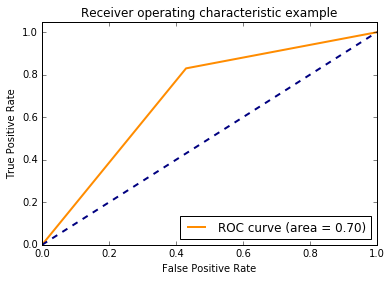

In [7]:
pred_sum_e = [1 if x[0]>x[1] else 0 for x in prediction[:100] ]
pred_sum_f = [0  if x[0]<x[1] else 1 for x in prediction[100:]]
y_e = [1]*100 + [0]*100
scores_e = pred_sum_e + pred_sum_f

from sklearn.metrics import roc_curve, auc
fpr_e, tpr_e, thresholds_e = roc_curve(y_e, scores_e)
roc_auc_e = auc(fpr_e, tpr_e)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr_e, tpr_e, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_e)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [8]:
print('Build eng model 2...')
model_eng = Sequential()
model_eng.add(LSTM(128, return_sequences=True,
               input_shape=(maxlen, len(chars)))) 
model_eng.add(LSTM(128, return_sequences=True))  
model_eng.add(LSTM(128))  
model_eng.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.001)
model_eng.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

print('Build frn model 2...')
model_frn = Sequential()
model_frn.add(LSTM(128, return_sequences=True,
               input_shape=(maxlen, len(chars)))) 
model_frn.add(LSTM(128, return_sequences=True))  
model_frn.add(LSTM(128))  
model_frn.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.001)
model_frn.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

Build eng model 2...
Build frn model 2...


In [21]:
model_eng.fit(X_eng, y_eng,
          batch_size=512,
          epochs=8)


Epoch 1/8
139607/139607 [==============================] - 26s - loss: 1.4005 - acc: 0.5744     

In [22]:
model_frn.fit(X_frn, y_frn,
          batch_size=512,
          epochs=8)

Epoch 1/8
156026/156026 [==============================] - 29s - loss: 1.3935 - acc: 0.5600     

In [23]:
ngram_e = []
ngram_f = []
next_chars_e = []
next_chars_f = []

prediction = []

for i in range(len(test_string_eng)):
    prediction_product_eng = 1
    prediction_product_frn = 1
    for j in range(1,6):
        current_string = test_string_eng[i][:j]
        next_char_index = char_indices[test_string_eng[i][j]]
        current_string_vec = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
        for t, char in enumerate(current_string):
            current_string_vec[0, t, char_indices[char]] = 1
            eng_pred = model_eng.predict(current_string_vec)[0]
            frn_pred = model_frn.predict(current_string_vec)[0]
            prediction_product_eng *= eng_pred[next_char_index]
            prediction_product_frn *= frn_pred[next_char_index]
    prediction.append((np.e ** np.log(prediction_product_eng),np.e ** np.log(prediction_product_frn)))
    
for i in range(len(test_string_frn)):
    prediction_product_eng = 1
    prediction_product_frn = 1
    for j in range(1,6):
        current_string = test_string_frn[i][:j]
        next_char_index = char_indices[test_string_frn[i][j]]
        current_string_vec = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
        for t, char in enumerate(current_string):
#             print (t,char)
            current_string_vec[0, t, char_indices[char]] = 1
            eng_pred = model_eng.predict(current_string_vec)[0]
            frn_pred = model_frn.predict(current_string_vec)[0]
#             print (eng_pred)
            prediction_product_eng *= eng_pred[next_char_index]
            prediction_product_frn *= frn_pred[next_char_index]
    prediction.append((np.e ** np.log(prediction_product_eng),np.e ** np.log(prediction_product_frn)))
        
pred_sum_e = [1 if x[0]>x[1] else 0 for x in prediction[:100] ]
pred_sum_f = [1  if x[0]<x[1] else 0 for x in prediction[100:]]

print (sum(pred_sum_e))
print (sum(pred_sum_f))


70
53


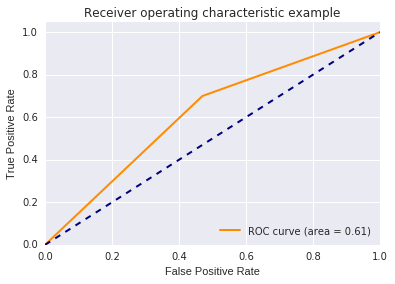

In [24]:
pred_sum_e = [1 if x[0]>x[1] else 0 for x in prediction[:100] ]
pred_sum_f = [0  if x[0]<x[1] else 1 for x in prediction[100:]]
y_e = [1]*100 + [0]*100
scores_e = pred_sum_e + pred_sum_f

from sklearn.metrics import roc_curve, auc
fpr_e, tpr_e, thresholds_e = roc_curve(y_e, scores_e)
roc_auc_e = auc(fpr_e, tpr_e)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr_e, tpr_e, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_e)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:

print('Build eng model 3...')
model_eng_3 = Sequential()
model_eng_3.add(LSTM(128, return_sequences=True,stateful=True,batch_input_shape=(1, 16, 45),
               input_shape=(maxlen, len(chars)))) 
model_eng_3.add(LSTM(128, return_sequences=True,stateful=True))  
model_eng_3.add(LSTM(128,stateful=True))  
model_eng_3.add(Dense(len(chars), activation='sigmoid'))

optimizer = RMSprop(lr=0.001)
model_eng_3.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

print('Build frn model 3...')
model_frn_3 = Sequential()
model_frn_3.add(LSTM(128, return_sequences=True,stateful=True,batch_input_shape=(1, 16, 45),
               input_shape=(maxlen, len(chars)))) 
model_frn_3.add(LSTM(128, return_sequences=True,stateful=True))  
model_frn_3.add(LSTM(128,stateful=True))  
model_frn_3.add(Dense(len(chars), activation='sigmoid'))

optimizer = RMSprop(lr=0.001)
model_frn_3.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

Build eng model 3...
Build frn model 3...


In [14]:
import scipy
import seaborn as sns
from sklearn import ensemble
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn import cross_validation
from sklearn import metrics


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
def generate_sub_string(maxlen,text,sentences, language, label_arr):
    for i in range(0, len(text) - maxlen):
        sentences.append(text[i: i + maxlen])
        label_arr.append(language)
        
        
eng_substr = []
language_eng = []
frn_substr = []
language_frn = []

for i in range(5,40):
    generate_sub_string(i,text_eng,eng_substr, 'English',language_eng)
    
for i in range(5,40):
    generate_sub_string(i,text_frn,frn_substr, 'French',language_frn)

In [16]:

lang_substr = eng_substr + frn_substr
lang_label = language_eng + language_frn


In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lang_substr, lang_label, test_size=0.1, random_state=42)

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 6),
                             analyzer='char',use_idf=True)

pipe = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_predicted = pipe.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predicted)

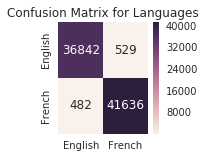

In [18]:

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True,  fmt='', xticklabels=['English', 'French'], yticklabels=['English', 'French']);
plt.title('Confusion Matrix for Languages');

Accuracy score for the model 0.987281259042
             precision    recall  f1-score   support

    English       0.99      0.99      0.99     37371
     French       0.99      0.99      0.99     42118

avg / total       0.99      0.99      0.99     79489



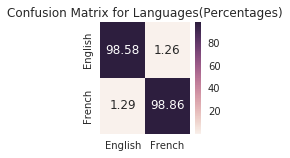

In [19]:

import sklearn
print ('Accuracy score for the model', sklearn.metrics.accuracy_score(y_test, y_predicted, normalize=True, sample_weight=None))
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=['English', 'French']))
percentage_matrix = 100 * cm / cm.sum(axis=1).astype(float)

plt.figure(figsize=(2, 2))
sns.heatmap(percentage_matrix, annot=True,  fmt='.2f', xticklabels=['English', 'French'], yticklabels=['English', 'French']);
plt.title('Confusion Matrix for Languages(Percentages)');

In [25]:
model_e_3 = Sequential()
model_e_3.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_e_3.add(Dense(len(chars)))
model_e_3.add(Activation('softmax'))
model_e_3.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])

model_f_3 = Sequential()
model_f_3.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_f_3.add(Dense(len(chars)))
model_f_3.add(Activation('softmax'))
model_f_3.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])
print ('done building model')

done building model


In [32]:
from keras.callbacks import EarlyStopping
model_e_3.fit(X_eng, y_eng,
          batch_size=128,
          epochs=5, verbose = 1, validation_split=1/12.,callbacks = [EarlyStopping(monitor='val_loss', patience=1.65, verbose=0)])



Train on 127973 samples, validate on 11634 samples
Epoch 1/5
127973/127973 [==============================] - 29s - loss: 1.1484 - acc: 0.6450 - val_loss: 1.6037 - val_acc: 0.5216

In [34]:
model_f_3.fit(X_frn, y_frn,
          batch_size=128,
          epochs=5, verbose = 1, validation_split=1/12.,callbacks = [EarlyStopping(monitor='val_loss', patience=1.65, verbose=0)])


Train on 143023 samples, validate on 13003 samples
Epoch 1/5
143023/143023 [==============================] - 32s - loss: 1.9050 - acc: 0.4228 - val_loss: 2.2612 - val_acc: 0.3288

In [40]:
X_eng_test = np.zeros((len(test_string_eng), maxlen, len(chars)), dtype=np.bool)
y_eng_test = np.zeros((len(test_string_eng), len(chars)), dtype=np.bool)
for i, sentence in enumerate(tet_string_eng):
    for t, char in enumerate(sentence):
        X_eng_test[i, t, char_indices[char]] = 1
        y_eng_test[i, char_indices[next_chars_eng[i]]] = 1
            

score_e = model_e_3.evaluate(X_eng, y_eng, verbose = 0)

In [41]:
print ('Model score for early stopping')
print ('Test score', score_e[0])
print ('Test accuracy', score_e[1])

Model score for early stopping
Test score 1.09500080641
Test accuracy 0.658856647589


In [45]:
X_frn_test = np.zeros((len(test_string_frn), maxlen, len(chars)), dtype=np.bool)
y_frn_test = np.zeros((len(test_string_frn), len(chars)), dtype=np.bool)
for i, sentence in enumerate(test_string_frn):
    for t, char in enumerate(sentence):
        X_frn_test[i, t, char_indices[char]] = 1
        y_frn_test[i, char_indices[next_chars_frn[i]]] = 1
            

score_f = model_f_3.evaluate(X_frn, y_frn, verbose = 0)
print ('Model score for early stopping')
print ('Test score', score_f[0])
print ('Test accuracy', score_f[1])

Model score for early stopping
Test score 1.63627069864
Test accuracy 0.489226154621


In [55]:
eng_train_string = []
frn_train_string = []
eng_test_string = []
frn_test_string = []
def generate_sub_string(maxlen,text,sentences):
    for i in range(0, len(text) - maxlen):
        sentences.append(text[i: i + maxlen])

        
for i in range(1,maxlen):
    generate_sub_string(i,train_eng,eng_train_string)
    generate_sub_string(i,train_frn,frn_train_string)
    generate_sub_string(i,test_eng,eng_test_string)
    generate_sub_string(i,test_frn,frn_test_string)

In [59]:
from collections import Counter

lang_prof_eng = Counter(eng_train_string)
lang_prof_frn = Counter(frn_train_string)
doc_prof_eng = Counter(eng_test_string)
doc_prof_frn = Counter(frn_test_string)

In [64]:
def calcDistance(lang_prof, doc_prof):
    document_distance = 0
    category_ngrams_sorted = [ngram[0] for ngram in lang_prof]
    document_ngrams_sorted = [ngram[0] for ngram in doc_prof]
    maximum_out_of_place_value = len(document_ngrams_sorted)
    for ngram in document_ngrams_sorted:
        document_index = document_ngrams_sorted.index(ngram)
        try:
            category_profile_index = category_ngrams_sorted.index(ngram)
        except ValueError:
            category_profile_index = maximum_out_of_place_value
        distance = abs(category_profile_index-document_index)
        document_distance+=distance
    return distance

In [68]:
d1 = calcDistance(lang_prof_eng,doc_prof_eng)
d2 = calcDistance(lang_prof_frn,doc_prof_frn)
d3 = calcDistance(lang_prof_eng,doc_prof_frn)
d4 = calcDistance(lang_prof_frn,doc_prof_eng)

print('Distance between document and language profile of')
print ('ENG-ENG',d1)
print ('ENG-FRN',d4)
print ('FRN-FRN',d2)
print ('FRN-ENG',d3)

Distance between document and language profile of
ENG-ENG 50
ENG-FRN 53
FRN-FRN 22
FRN-ENG 23
